In [1]:
import pandas as pd
import numpy as np

In [2]:
pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
pr_commit_details_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commit_details.parquet")

/Users/dungp@backbase.com/Documents/aidev-mining/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [5]:
pr_commits_df.isnull().sum()

sha          0
pr_id        0
author       1
committer    1
message      1
dtype: int64

In [6]:
pr_commits_df.shape

(88576, 5)

In [10]:
pr_commits_df[pr_commits_df['sha'] == "2f9d54dda4f0c87c19e0bbeb9936f525d0587e16"]

,sha,pr_id,author,committer,message
71336,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...


In [11]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [3]:
pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pull_request.parquet")

In [13]:
pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264933329,2911,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,Claude_Code,108661493,weiliu1031,closed,2025-07-26T02:59:01Z,2025-07-29T07:01:20Z,None,191751505,https://api.github.com/repos/milvus-io/pymilvus,https://github.com/milvus-io/pymilvus/pull/2911
1,3265118634,2,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,Claude_Code,61827001,cm-kojimat,closed,2025-07-26T04:56:55Z,2025-07-26T22:12:24Z,2025-07-26T22:12:24Z,1025472321,https://api.github.com/repos/classmethod/tsumiki,https://github.com/classmethod/tsumiki/pull/2
2,3265640341,30,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,Claude_Code,7475,MSch,closed,2025-07-26T13:31:19Z,2025-07-26T13:37:22Z,2025-07-26T13:37:22Z,988488798,https://api.github.com/repos/steipete/Peekaboo,https://github.com/steipete/Peekaboo/pull/30
3,3265709660,205,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,Claude_Code,80381,sugyan,closed,2025-07-26T14:07:22Z,2025-07-26T14:45:30Z,2025-07-26T14:45:30Z,999285986,https://api.github.com/repos/sugyan/claude-cod...,https://github.com/sugyan/claude-code-webui/pu...
4,3265782173,17625,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,Claude_Code,47593288,adust09,open,2025-07-26T15:02:48Z,None,None,537233603,https://api.github.com/repos/paradigmxyz/reth,https://github.com/paradigmxyz/reth/pull/17625


In [14]:
pr_df.isnull().sum()/len(pr_df)

id            0.000000
number        0.000000
title         0.000000
body          0.010716
agent         0.000000
user_id       0.000000
user          0.000000
state         0.000000
created_at    0.000000
closed_at     0.068818
merged_at     0.285213
repo_id       0.000000
repo_url      0.000000
html_url      0.000000
dtype: float64

In [15]:
pr_df.title.str.len().describe()

count    33596.000000
mean        42.847393
std         18.126174
min          1.000000
25%         30.000000
50%         39.000000
75%         51.000000
max        351.000000
Name: title, dtype: float64

In [16]:
pr_df.body.str.len().describe()

count    33236.000000
mean       940.919966
std       1657.329252
min          1.000000
25%        276.000000
50%        387.000000
75%        956.000000
max      77435.000000
Name: body, dtype: float64

In [4]:
# Human-PR
human_pr_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pull_request.parquet")
human_pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/human_pr_task_type.parquet")

In [18]:
human_pr_df.isnull().sum()/len(human_pr_df)

id            0.000000
number        0.000000
title         0.000000
user          0.000000
user_id       0.000000
state         0.000000
created_at    0.000000
closed_at     0.070867
merged_at     0.232245
repo_url      0.000000
html_url      0.000000
body          0.150348
agent         0.000000
dtype: float64

In [19]:
human_pr_df.title.str.len().describe()

count    6618.000000
mean       44.265941
std        20.592332
min         2.000000
25%        29.000000
50%        43.000000
75%        56.000000
max       389.000000
Name: title, dtype: float64

In [20]:
human_pr_df.body.str.len().describe()

count     5623.000000
mean      2136.398186
std       5656.123998
min          2.000000
25%        228.000000
50%        690.000000
75%       1873.500000
max      80113.000000
Name: body, dtype: float64

*** insights: we can see that human PRs have more missing values in the body than the agentic PRs. but human PRs description are more longer than agentic PRs. both title and body description are more longer for human PRs. At the commit level, Agentic PRs have longer commit messages than human PRs.

In [21]:
human_commit_details_df = pd.read_parquet("../data/github/output/human_pr_commit_details_part_1.parquet")
human_commit_details_df.head()

,sha,pr_id,file,status,additions,deletions,changes,patch,message,author,author_email,date
0,c5470b1f0c6a4fbfbd1847250099e1995dafde3b,2336888723,static/app/components/workflowEngine/gridCell/...,modified,14,4,18,"@@ -19,9 +19,10 @@ export type Action = keyof ...",feat(aci): add automations index page,Mia Hsu,ameliahsu@gmail.com,2025-02-14T18:38:44Z
1,c5470b1f0c6a4fbfbd1847250099e1995dafde3b,2336888723,static/app/components/workflowEngine/useBulkAc...,modified,8,8,16,"@@ -7,12 +7,12 @@ import Checkbox from 'sentry...",feat(aci): add automations index page,Mia Hsu,ameliahsu@gmail.com,2025-02-14T18:38:44Z
2,c5470b1f0c6a4fbfbd1847250099e1995dafde3b,2336888723,static/app/views/automations/components/automa...,added,158,0,158,"@@ -0,0 +1,158 @@\n+import styled from '@emoti...",feat(aci): add automations index page,Mia Hsu,ameliahsu@gmail.com,2025-02-14T18:38:44Z
3,c5470b1f0c6a4fbfbd1847250099e1995dafde3b,2336888723,static/app/views/automations/components/automa...,added,131,0,131,"@@ -0,0 +1,131 @@\n+import styled from '@emoti...",feat(aci): add automations index page,Mia Hsu,ameliahsu@gmail.com,2025-02-14T18:38:44Z
4,c5470b1f0c6a4fbfbd1847250099e1995dafde3b,2336888723,static/app/views/automations/list.tsx,modified,63,1,64,"@@ -1,27 +1,89 @@\n import {Fragment} from 're...",feat(aci): add automations index page,Mia Hsu,ameliahsu@gmail.com,2025-02-14T18:38:44Z


In [22]:
human_commit_details_df.isnull().sum()/len(human_commit_details_df)

sha             0.000000
pr_id           0.000000
file            0.000000
status          0.000000
additions       0.000000
deletions       0.000000
changes         0.000000
patch           0.084722
message         0.000000
author          0.000000
author_email    0.000000
date            0.000000
dtype: float64

In [23]:
human_commit_details_df.message.str.len().describe()

count    50270.000000
mean        68.154446
std        226.191948
min          1.000000
25%         31.000000
50%         46.000000
75%         61.000000
max      11278.000000
Name: message, dtype: float64

In [24]:
pr_commit_details_df.isnull().sum()/len(pr_commit_details_df)

sha                       0.000000
pr_id                     0.000000
author                    0.000004
committer                 0.000004
message                   0.000028
commit_stats_total        0.000000
commit_stats_additions    0.000000
commit_stats_deletions    0.000000
filename                  0.007209
status                    0.007209
additions                 0.007209
deletions                 0.007209
changes                   0.007209
patch                     0.098609
dtype: float64

In [25]:
pr_commit_details_df.message.str.len().describe()

count    711903.000000
mean        108.971217
std         454.774705
min           1.000000
25%          38.000000
50%          57.000000
75%         104.000000
max       54214.000000
Name: message, dtype: float64

In [50]:
from transformers import pipeline
import torch

text = [
    "Brevity is the soul of wit.",
    "Amor, ch'a nullo amato amar perdona."
]

model_ckpt = "papluca/xlm-roberta-base-language-detection"
device = 0 if torch.backends.mps.is_available() else -1
pipe = pipeline("text-classification", model=model_ckpt, device=device)
pipe(text, top_k=1, truncation=True)


[[{'label': 'en', 'score': 0.8889275193214417}],
 [{'label': 'it', 'score': 0.912011981010437}]]

In [ ]:
def detect_language(x):
    if not isinstance(x, str) or not x.strip():
        return None
    return pipe(x,top_k=1,truncation=True)[0]['label']

In [55]:
human_pr_df['language_used_in_body'] = human_pr_df['body'].apply(lambda x: detect_language(x))

In [56]:
human_pr_df['language_used_in_title'] = human_pr_df['title'].apply(lambda x: detect_language(x))

In [58]:
human_pr_df.language_used_in_title.value_counts()/len(human_pr_df)

language_used_in_title
en    0.837715
it    0.032940
sw    0.032336
ur    0.031429
pt    0.023874
hi    0.018586
nl    0.008311
tr    0.003324
ja    0.002720
de    0.002418
zh    0.001813
pl    0.001813
es    0.001058
bg    0.000907
fr    0.000604
ru    0.000151
Name: count, dtype: float64

In [59]:
human_pr_df.language_used_in_body.value_counts()/len(human_pr_df)

language_used_in_body
en    0.822303
ur    0.004986
hi    0.004533
ja    0.004533
zh    0.003929
sw    0.002720
it    0.001813
pt    0.001511
tr    0.001058
nl    0.000756
pl    0.000604
es    0.000453
fr    0.000151
bg    0.000151
ru    0.000151
Name: count, dtype: float64

In [64]:
human_pr_df[human_pr_df['language_used_in_body'] != human_pr_df['language_used_in_title']].iloc[0]['body']

'https://sentry-j41gpomr5.sentry.dev/automations\r\n\r\nhttps://github.com/user-attachments/assets/5bb19787-5d94-460f-9fa1-deef76049f74\r\n\r\n'

In [73]:
text = 'This is a test'

pipe(text, top_k=1, truncation=True)

[{'label': 'en', 'score': 0.9789775609970093}]

# Using pretrained model to generate pr description

## Load fine-tuned model for PR description generation

In [97]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Path to your checkpoint
checkpoint_path = "../models/t5"

# Load tokenizer and model from the checkpoint
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)


In [99]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Path to your checkpoint
checkpoint_path = "../models/bart/"

# Load tokenizer and model from the checkpoint
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)


In [100]:
# Example input
input_text = "ファイルパス参照を相対パスに統一し、doc/からdocs/に統一"
inputs = tokenizer(input_text, return_tensors="pt", truncation=True)

# Generate predictions
outputs = model.generate(**inputs, max_length=2000)
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Prediction:", decoded_output)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Prediction: ファイルパス参照を相対パスに統一し、doc/からdocs/に�ñ一


In [95]:
sub_pr_df = pr_df.sample(5000)
sub_pr_df['language_used_in_body'] = sub_pr_df['body'].apply(lambda x: detect_language(x))

In [96]:
sub_pr_df.head()

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,language_used_in_body
1224,3212273826,1257,Invoke mockery via go tool in go generate anno...,This PR migrates the project to use the Go too...,Copilot,198982749,Copilot,closed,2025-07-08T12:02:15Z,2025-07-08T13:07:04Z,2025-07-08T13:07:04Z,184717139,https://api.github.com/repos/justtrackio/gosoline,https://github.com/justtrackio/gosoline/pull/1257,en
7839,3127841891,1836,[alpha_factory] add ipywidgets governance demo,## Summary\n- add ipywidgets slider and run bu...,OpenAI_Codex,24208299,MontrealAI,closed,2025-06-08T02:48:44Z,2025-06-08T02:48:55Z,2025-06-08T02:48:55Z,922805069,https://api.github.com/repos/MontrealAI/AGI-Al...,https://github.com/MontrealAI/AGI-Alpha-Agent-...,en
9330,3191009322,4394,Add Python first builtin and TPCDS q10-q19 out...,## Summary\n- implement `_first` helper for Py...,OpenAI_Codex,1218621,tamnd,closed,2025-07-01T06:56:52Z,2025-07-01T06:57:16Z,2025-07-01T06:57:16Z,985853139,https://api.github.com/repos/mochilang/mochi,https://github.com/mochilang/mochi/pull/4394,en
19623,3245299670,10247,Add list assignment support to Elixir transpiler,## Summary\n- support nested list index assign...,OpenAI_Codex,1218621,tamnd,closed,2025-07-19T13:14:23Z,2025-07-19T13:17:55Z,2025-07-19T13:17:55Z,985853139,https://api.github.com/repos/mochilang/mochi,https://github.com/mochilang/mochi/pull/10247,en
6908,3225610438,8125,Update Zig compiler for TPCH Q1 support,## Summary\n- start tracking query expressions...,OpenAI_Codex,1218621,tamnd,closed,2025-07-12T17:36:47Z,2025-07-12T17:36:59Z,2025-07-12T17:36:59Z,985853139,https://api.github.com/repos/mochilang/mochi,https://github.com/mochilang/mochi/pull/8125,en


In [98]:
en_sub_pr_df = sub_pr_df[sub_pr_df['language_used_in_body'] == 'en']
en_sub_pr_df.shape

(4874, 15)

## Embedding

In [100]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load your embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to convert a column of texts to embeddings
def add_embeddings(df, text_col, embedding_col):
    """
    Adds a column of embeddings for the given text column.
    """
    embeddings = model.encode(df[text_col].tolist())
    df[embedding_col] = list(embeddings)
    return df

# Function to compute row-wise cosine similarity between two embedding columns
def add_similarity(df, emb_col1, emb_col2, sim_col='similarity'):
    """
    Computes cosine similarity row-wise between two embedding columns.
    """
    similarities = np.array([
        cosine_similarity(e1.reshape(1, -1), e2.reshape(1, -1))[0][0]
        for e1, e2 in zip(df[emb_col1], df[emb_col2])
    ])
    df[sim_col] = similarities
    return df

In [101]:
en_sub_pr_df_em = en_sub_pr_df[['id', 'body']].reset_index(drop=True)
en_sub_pr_df_em = add_embeddings(en_sub_pr_df_em, 'body', 'embedding_body')

In [104]:
en_sub_pr_df_em.rename(columns={'id': 'pr_id'}, inplace=True)
en_sub_pr_df_em.head(2)

,pr_id,body,embedding_body
0,3212273826,This PR migrates the project to use the Go too...,"[-0.07683316, 0.004195972, -0.02212184, -0.062..."
1,3127841891,## Summary\n- add ipywidgets slider and run bu...,"[-0.01959865, -0.06942399, 0.0042449147, -0.01..."


In [108]:
pr_commits_df.head(2)

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...


In [110]:
sub_pr_commits_df = pr_commits_df[pr_commits_df['pr_id'].isin(en_sub_pr_df_em['pr_id'])]

In [112]:
en_sub_pr_commits_df = sub_pr_commits_df.groupby('pr_id').agg({'message': ' '.join}).reset_index()

In [113]:
en_sub_pr_commits_df.head(2)

,pr_id,message
0,2758200405,Fix WASM auto install UI race condition\n\n- A...
1,2761288801,feat: add default view setting to user prefere...


In [114]:
en_sub_pr_commits_df = add_embeddings(en_sub_pr_commits_df, 'message', 'embedding_message')

In [115]:
en_sub_pr_commits_df.head()

,pr_id,message,embedding_message
0,2758200405,Fix WASM auto install UI race condition\n\n- A...,"[-0.060940847, -0.04044097, 0.05229455, 0.0647..."
1,2761288801,feat: add default view setting to user prefere...,"[0.06574308, -0.07503786, -0.026611082, 0.0603..."
2,2761443934,docs: improve tool documentation and examples\...,"[-0.015705887, 0.014190091, 0.016707843, -0.00..."
3,2762078403,fix: interpolate output_file attribute from YA...,"[-0.042749524, 0.011662685, -0.0445698, 0.0191..."
4,2762310020,Add comprehensive documentation for all tools\...,"[-0.059127714, -0.03816811, -0.018860431, 0.00..."


In [120]:
df = en_sub_pr_df_em.merge(en_sub_pr_commits_df, on='pr_id', how='inner')

In [121]:
df.head()

,pr_id,body,embedding_body,message,embedding_message
0,3212273826,This PR migrates the project to use the Go too...,"[-0.07683316, 0.004195972, -0.02212184, -0.062...",Initial plan Implement go tool convention for ...,"[-0.04748952, -0.011983311, -0.032642785, -0.0..."
1,3127841891,## Summary\n- add ipywidgets slider and run bu...,"[-0.01959865, -0.06942399, 0.0042449147, -0.01...",[alpha_factory] add ipywidgets demo,"[-0.021199819, 0.009959249, -0.07156952, -0.04..."
2,3191009322,## Summary\n- implement `_first` helper for Py...,"[-0.07136111, -0.005052941, 0.010382675, 0.009...",py: add first builtin and update TPCDS q10-q19,"[-0.063909456, 0.0076314164, -0.035461247, -0...."
3,3245299670,## Summary\n- support nested list index assign...,"[0.005906277, 0.015554712, 0.020248944, 0.0218...",ex transpiler: update docs for new golden,"[-0.066767074, -0.029088302, 0.03520238, 0.024..."
4,3225610438,## Summary\n- start tracking query expressions...,"[-0.014643107, 0.06987881, -0.043729316, 0.064...",zig compiler: begin support for tpch q1 grouping,"[-0.081879824, 0.09218795, -0.041559175, 0.012..."


In [122]:
df_sim = add_similarity(df, 'embedding_body', 'embedding_message')

In [123]:
df_sim.head()

,pr_id,body,embedding_body,message,embedding_message,similarity
0,3212273826,This PR migrates the project to use the Go too...,"[-0.07683316, 0.004195972, -0.02212184, -0.062...",Initial plan Implement go tool convention for ...,"[-0.04748952, -0.011983311, -0.032642785, -0.0...",0.730431
1,3127841891,## Summary\n- add ipywidgets slider and run bu...,"[-0.01959865, -0.06942399, 0.0042449147, -0.01...",[alpha_factory] add ipywidgets demo,"[-0.021199819, 0.009959249, -0.07156952, -0.04...",0.511823
2,3191009322,## Summary\n- implement `_first` helper for Py...,"[-0.07136111, -0.005052941, 0.010382675, 0.009...",py: add first builtin and update TPCDS q10-q19,"[-0.063909456, 0.0076314164, -0.035461247, -0....",0.563901
3,3245299670,## Summary\n- support nested list index assign...,"[0.005906277, 0.015554712, 0.020248944, 0.0218...",ex transpiler: update docs for new golden,"[-0.066767074, -0.029088302, 0.03520238, 0.024...",0.480381
4,3225610438,## Summary\n- start tracking query expressions...,"[-0.014643107, 0.06987881, -0.043729316, 0.064...",zig compiler: begin support for tpch q1 grouping,"[-0.081879824, 0.09218795, -0.041559175, 0.012...",0.532215


In [125]:
df_sim['similarity'].describe()

count    4873.000000
mean        0.537517
std         0.164188
min        -0.057418
25%         0.441985
50%         0.549423
75%         0.651926
max         0.983544
Name: similarity, dtype: float64

In [126]:
df_sim[df_sim['similarity'] <0 ].head()

,pr_id,body,embedding_body,message,embedding_message,similarity
1430,3075009767,## Summary\n- allow parallel execution in `Age...,"[-0.0052757333, 0.004239091, -0.022650387, -0....",Address review comment,"[-0.114444256, 0.026358603, 0.0072871265, 0.03...",-0.012899
1516,3203260344,## Problem\n\nThe data table component only su...,"[-0.018740041, 0.0088453805, -0.067903824, 0.0...",Initial plan,"[-0.03279338, 0.04705235, 0.014396712, 0.00758...",-0.057418
1974,3207638926,## Summary\n\nThis PR provides a comprehensive...,"[-0.04511028, -0.002235865, -0.07089036, 0.008...",Initial plan,"[-0.03279338, 0.04705235, 0.014396712, 0.00758...",-0.027553
2804,3269759400,This PR marks the `ParameterResource.Value` pr...,"[-0.03341726, 0.10127857, -0.07750897, 0.06226...",Initial plan,"[-0.03279338, 0.04705235, 0.014396712, 0.00758...",-0.004305
4855,3234694478,Thanks for assigning this issue to me. I'm sta...,"[-0.023346199, 0.0090912795, 0.071001545, -0.0...",Initial plan,"[-0.03279338, 0.04705235, 0.014396712, 0.00758...",-0.017959


## Commit messages generation model

In [129]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("JetBrains-Research/cmg-codet5-without-history")
model = AutoModelForSeq2SeqLM.from_pretrained("JetBrains-Research/cmg-codet5-without-history")

'@@ -19,9 +19,10 @@ export type Action = keyof typeof ActionMetadata;\n \n type ActionCellProps = {\n   actions: Action[];\n+  disabled?: boolean;\n };\n \n-export function ActionCell({actions}: ActionCellProps) {\n+export function ActionCell({actions, disabled}: ActionCellProps) {\n   if (!actions || actions.length === 0) {\n     return <EmptyCell />;\n   }\n@@ -35,20 +36,29 @@ export function ActionCell({actions}: ActionCellProps) {\n   }\n   const actionsList = actions.map(action => ActionMetadata[action].name).join(\', \');\n   return (\n-    <Flex align="center" gap={space(0.75)}>\n+    <ActionContainer align="center" gap={space(0.75)}>\n       <IconContainer>\n         <IconCircledNumber number={actions.length} />\n       </IconContainer>\n-      <Tooltip title={actionsList}>\n+      <Tooltip title={actionsList} disabled={disabled}>\n         <ActionsList>{actionsList}</ActionsList>\n       </Tooltip>\n-    </Flex>\n+    </ActionContainer>\n   );\n }\n \n+const ActionContainer = 

In [134]:
sample_patch = human_commit_details_df['patch'][0]

inputs = tokenizer(sample_patch, return_tensors="pt", truncation=True)
outputs = model.generate(**inputs, max_length=2000)
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Prediction:", decoded_output)

Prediction: Add disabled prop to ActionCell


In [135]:
from bert_score import score

# Example data
cands = ["the cat is on the mat", "there is a cat"]
refs = ["the cat sits on the mat", "a cat is present"]

# Compute scores
P, R, F1 = score(cands, refs, lang="en", verbose=True)

# Print mean scores
print(f"Precision: {P.mean().item():.4f}")
print(f"Recall:    {R.mean().item():.4f}")
print(f"F1:        {F1.mean().item():.4f}")


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 158.18it/s]

done in 0.16 seconds, 12.51 sentences/sec
Precision: 0.9094
Recall:    0.9062
F1:        0.9078


## Bert score calculation

In [144]:
from bert_score import score

cands = ["The stock market crashed yesterday."]
refs = ["A young boy is playing with a ball in the park."]

P, R, F1 = score(cands, refs, lang="en", rescale_with_baseline=True, model_type="microsoft/deberta-xlarge-mnli")

print(f"Precision: {P.mean().item():.4f}")
print(f"Recall:    {R.mean().item():.4f}")
print(f"F1:        {F1.mean().item():.4f}")


Precision: 0.1459
Recall:    0.2098
F1:        0.1803


In [147]:
cands = ["I am diving into the ocean"]
refs = ["Last night, i was swimming in the ocean"]

P, R, F1 = score(cands, refs, lang="en", rescale_with_baseline=True, model_type="microsoft/deberta-xlarge-mnli")

print(f"Precision: {P.mean().item():.4f}")
print(f"Recall:    {R.mean().item():.4f}")
print(f"F1:        {F1.mean().item():.4f}")


Precision: 0.7070
Recall:    0.5545
F1:        0.6288


# Building classification model

In [5]:
base_df = pr_df[['id', 'title', 'body']]
base_df.columns = ['pr_id', 'pr_title', 'pr_body']

In [6]:
base_df.head()

,pr_id,pr_title,pr_body
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...
1,3265118634,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...
2,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...
3,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...
4,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...


In [ ]:
from transformers import pipeline
import torch

text = [
    "Brevity is the soul of wit.",
    "Amor, ch'a nullo amato amar perdona."
]

model_ckpt = "papluca/xlm-roberta-base-language-detection"
device = 0 if torch.backends.mps.is_available() else -1
pipe = pipeline("text-classification", model=model_ckpt, device=device)
pipe(text, top_k=1, truncation=True)


In [ ]:
def detect_language(x):
    if not isinstance(x, str) or not x.strip():
        return None, None
    result = pipe(x, top_k=1, truncation=True)[0]
    return result['label'], result['score']

In [163]:

def add_language_confidence(df: pd.DataFrame, column_name: str):
    df[['language', 'confidence']] = df[column_name].apply(detect_language).apply(pd.Series)
    return df

In [164]:
base_df = add_language_confidence(base_df, 'pr_body')

/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_15358/2095008140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['language', 'confidence']] = df[column_name].apply(detect_language).apply(pd.Series)
/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_15358/2095008140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['language', 'confidence']] = df[column_name].apply(detect_language).apply(pd.Series)


In [165]:
base_df.head()

,pr_id,pr_title,pr_body,language,confidence
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,en,0.992134
1,3265118634,ファイルパス参照を相対パスに統一し、doc/からdocs/に統一,## 背景\n\n現在、本プロジェクトにおいて以下のパス構成の不整合が生じています：\n\n...,ja,0.989274
2,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,en,0.992562
3,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,en,0.991064
4,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,en,0.957770


In [ ]:
# base_df.to_parquet("/Users/dungp@backbase.com/Documents/aidev-mining/data/classification/pr_df_with_language.parquet")

In [7]:
base_df = pd.read_parquet("/Users/dungp@backbase.com/Documents/aidev-mining/data/classification/pr_df_with_language.parquet")

In [8]:
base_df.shape

(33596, 5)

In [9]:
base_df[base_df['confidence'] > 0.7].shape

(31631, 5)

In [10]:
base_df_filtered = base_df[(base_df['confidence'] > 0.7) & (base_df['language'] == 'en')]
base_df_filtered.drop(columns=['confidence', 'language'], axis=1, inplace=True)
base_df_filtered.head()

/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/4239870594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df_filtered.drop(columns=['confidence', 'language'], axis=1, inplace=True)


,pr_id,pr_title,pr_body
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...
2,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...
3,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...
4,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...
5,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...


In [11]:
base_df_filtered.shape

(31404, 3)

In [12]:
base_df_filtered.pr_id.nunique() == base_df_filtered.shape[0]

True

In [13]:
def add_pr_title_length(df: pd.DataFrame, column_name: str):
    df['pr_title_length'] = df[column_name].str.len()
    return df
base_df_filtered = add_pr_title_length(base_df_filtered, 'pr_title')
base_df_filtered.head()


/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/2629329127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pr_title_length'] = df[column_name].str.len()


,pr_id,pr_title,pr_body,pr_title_length
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75
2,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43
3,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64
4,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43
5,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89


In [14]:
def add_pr_body_length(df: pd.DataFrame, column_name: str):
    df['pr_body_length'] = df[column_name].str.len()
    return df
base_df_filtered = add_pr_body_length(base_df_filtered, 'pr_body')
base_df_filtered.head()


/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/3743475263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pr_body_length'] = df[column_name].str.len()


,pr_id,pr_title,pr_body,pr_title_length,pr_body_length
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928
2,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516
3,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222
4,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327
5,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905


In [15]:
def load_pr_task_type_df() -> pd.DataFrame:
    pr_task_type_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_task_type.parquet")
    pr_task_type_df.columns = ['agent', 'pr_id', 'title', 'reason', 'task_type', 'confidence']
    return pr_task_type_df

In [16]:
pr_task_type_df = load_pr_task_type_df()

In [17]:
pr_task_type_df.head()

,agent,pr_id,title,reason,task_type,confidence
0,Claude_Code,3264933329,Fix: Wait for all partitions in load_collectio...,title provides conventional commit label,fix,10
1,Claude_Code,3265709660,feat: add comprehensive README screenshots wit...,title provides conventional commit label,feat,10
2,Claude_Code,3265782173,chore: remove HashedPostStateProvider trait,title provides conventional commit label,chore,10
3,Claude_Code,3231949586,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10
4,Claude_Code,3231950376,feat(swagger): Add Swagger annotations to Batc...,title provides conventional commit label,feat,10


In [18]:
from loguru import logger

def add_pr_task_type(df: pd.DataFrame, pr_task_type_df: pd.DataFrame):
    pr_task_type_df = pr_task_type_df[['pr_id', 'task_type']]
    df = df.merge(pr_task_type_df, on='pr_id', how='left')
    logger.info(f'{df.shape[0]} rows after merging with pr_task_type_df')
    logger.info(f'task type colummn missing value: {df["task_type"].isnull().sum()}')
    return df

In [19]:
base_df_filtered = add_pr_task_type(base_df_filtered, pr_task_type_df)

2025-11-04 21:57:44.003 | INFO     | __main__:add_pr_task_type:6 - 31404 rows after merging with pr_task_type_df
2025-11-04 21:57:44.004 | INFO     | __main__:add_pr_task_type:7 - task type colummn missing value: 0


In [20]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat


In [21]:
import pandas as pd
import re

def detect_issue_task_linking(df: pd.DataFrame, column_name: str):
    """Extract valid issue/task linking phrases like 'Fixes #123', 'Closes BUG-456', etc."""
    pattern = re.compile(
        r'\b(?:closes|fixes|resolves|related to|issue links?|tickets?)'  # keyword
        r'(?:[:\s]+(?:#\d+|[A-Za-z]{2,}-\d+|[A-Za-z]+-\d+))',            # require proper issue ID format
        flags=re.IGNORECASE
    )

    df['issue_task_linking'] = (
        df[column_name]
        .astype(str)
        .apply(lambda x: "; ".join(re.findall(pattern, x)) or np.nan)
    )

    return df

In [22]:
def add_contains_issue_task_linking(df: pd.DataFrame, column_name: str):
    df = detect_issue_task_linking(df, column_name)
    df['contains_issue_task_linking'] = df['issue_task_linking'].notna()
    df.drop(columns=['issue_task_linking'], axis=1, inplace=True)
    return df

In [23]:
base_df_filtered = add_contains_issue_task_linking(base_df_filtered, 'pr_body')

In [24]:
def detect_common_template_heading(df: pd.DataFrame, column_name: str):
    pattern = re.compile(
    r'(?m)^(?:#+\s*|\s*|:)?(Description|Summary|Motivation|Context|Testing Steps|How to Test|Validation|Checklist|To-Do|Screenshots)\b',
    flags=re.IGNORECASE)

    df['common_template_heading'] = (
        df[column_name]
        .astype(str)
        .apply(lambda x: "; ".join(re.findall(pattern, x)) or np.nan)
    )
    return df

In [25]:
def add_common_template_heading_score(df: pd.DataFrame, column_name: str):
    """Extract common template headings, compute global max list length,
    and assign normalized score (0 if NaN or empty)."""
    df = df.copy()
    
    df = detect_common_template_heading(df, column_name)

    # Create list of unique headings
    df['common_template_heading_list'] = df['common_template_heading'].apply(
        lambda x: list(set(x.split('; '))) if isinstance(x, str) and x.strip() else []
    )

    df['common_template_heading_length'] = df['common_template_heading_list'].apply(len)

    # Compute global max
    max_len = df['common_template_heading_length'].max() or 1
    logger.info(f'max length of common template heading: {max_len}')

    # Compute score for each row
    df['common_template_heading_score'] = df['common_template_heading_length'].apply(
        lambda x: x / max_len if x else 0
    )

    df.drop(columns=['common_template_heading', 'common_template_heading_list', 'common_template_heading_length'], axis=1, inplace=True)

    return df

In [26]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False


In [27]:
base_df_filtered = add_common_template_heading_score(base_df_filtered, 'pr_body')

2025-11-04 21:57:51.029 | INFO     | __main__:add_common_template_heading_score:17 - max length of common template heading: 4


In [28]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25


In [29]:
import pandas as pd
import re

def detect_checklist_items(df: pd.DataFrame, column_name: str):
    """Detect checklist items like '- [ ]', '* [x]', or '[ ]' in text."""
    df = df.copy()
    pattern = r'^[\s*]*[-*]?\s*\[[xX\s]\]'
    df['checklist_items'] = df[column_name].apply(
        lambda x: '; '.join(re.findall(pattern, x, flags=re.MULTILINE)) if isinstance(x, str) else np.nan
    )
    return df


def add_contains_checklist_items(df: pd.DataFrame, column_name: str):
    df = df.copy()
    df = detect_checklist_items(df, column_name)
    df['contains_checklist_items'] = df['checklist_items'].notna()
    df.drop(columns=['checklist_items'], axis=1, inplace=True)
    return df

In [30]:
base_df_filtered = add_contains_checklist_items(base_df_filtered, 'pr_body')

In [31]:
def add_total_score_for_pr_template(df: pd.DataFrame):
    df = df.copy()
    df['pr_template_total_score'] = df['contains_issue_task_linking'] + df['common_template_heading_score'] + df['contains_checklist_items']
    return df

In [32]:
base_df_filtered = add_total_score_for_pr_template(base_df_filtered)

In [33]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25


In [34]:
def extract_code_snippets(df: pd.DataFrame, column_name: str):
    """Extract only code content from fenced code blocks (``` ... ```)."""
    df = df.copy()
    pattern = re.compile(r'```(?:\w*)\s*([\s\S]*?)```', flags=re.DOTALL)
    df['code_snippets'] = df[column_name].apply(
        lambda x: [code.strip() for code in pattern.findall(x)] if isinstance(x, str) else []
    )
    return df

def add_code_snippets_length_ratio(df: pd.DataFrame, column_name: str):
    df = df.copy()
    df = extract_code_snippets(df, column_name)
    df['code_snippets_length_ratio'] = df['code_snippets'].str.len() / df['pr_body_length']
    df.drop(columns=['code_snippets'], axis=1, inplace=True)
    logger.info(f'shape after extracting code snippets: {df.shape}')
    return df

def add_contains_code_snippets(df: pd.DataFrame, column_name: str):
    '''because the ratio is so small, transform as binary instead'''
    df = df.copy()
    df = extract_code_snippets(df, column_name)
    df['contains_code_snippets'] = df['code_snippets'].str.len() > 0
    df.drop(columns=['code_snippets'], axis=1, inplace=True)
    return df

In [35]:
base_df_filtered = add_contains_code_snippets(base_df_filtered, 'pr_body')

In [36]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,contains_code_snippets
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,False
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,True
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50,False
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25,False
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25,True


In [37]:
related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/issue.parquet")

In [38]:
def load_related_issue_df() -> pd.DataFrame:
    related_issue_df = pd.read_parquet("hf://datasets/hao-li/AIDev/related_issue.parquet")
    return related_issue_df

In [39]:
def add_number_of_related_issues(df: pd.DataFrame):
    df = df.copy()
    releated_issue_df = load_related_issue_df()
    grp = releated_issue_df.groupby('pr_id')['issue_id'].count().reset_index()
    grp.columns = ['pr_id', 'number_of_related_issues']
    df = df.merge(grp, on='pr_id', how='left')
    logger.info(f'shape after merging with related issue: {df.shape}')
    logger.info(f'percentage of related issues missing value: {df["number_of_related_issues"].isnull().sum()/df.shape[0]}')
    return df

In [40]:
base_df_filtered = add_number_of_related_issues(base_df_filtered)

2025-11-04 21:58:09.449 | INFO     | __main__:add_number_of_related_issues:7 - shape after merging with related issue: (31404, 12)
2025-11-04 21:58:09.450 | INFO     | __main__:add_number_of_related_issues:8 - percentage of related issues missing value: 0.84613425041396


In [41]:
base_df_filtered.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,contains_code_snippets,number_of_related_issues
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,False,NaN
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,True,NaN
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50,False,NaN
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25,False,NaN
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25,True,NaN


In [42]:
def load_pr_commits_df() -> pd.DataFrame:
    pr_commits_df = pd.read_parquet("hf://datasets/hao-li/AIDev/pr_commits.parquet")
    return pr_commits_df

In [43]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [44]:
def add_number_of_commits(df: pd.DataFrame):
    df = df.copy()
    pr_commits_df = load_pr_commits_df()
    grp = pr_commits_df.groupby('pr_id')['sha'].count().reset_index()
    grp.columns = ['pr_id', 'number_of_commits']
    df = df.merge(grp, on='pr_id', how='left')
    logger.info(f'shape after merging with pr_commits_df: {df.shape}')
    return df


def add_avg_commit_message_length(df: pd.DataFrame):
    df = df.copy()
    pr_commits_df = load_pr_commits_df()
    pr_commits_df = pr_commits_df[pr_commits_df['message'].isnull() == False]
    grp = pr_commits_df.groupby('pr_id').agg({'message': ' '.join}).reset_index()
    grp.columns = ['pr_id', 'commit_messages']
    df = df.merge(grp, on='pr_id', how='left')
    df['avg_commit_message_length'] = df['commit_messages'].str.len() / df['number_of_commits']
    df.drop(columns=['commit_messages'], axis=1, inplace=True)
    logger.info(f'shape after merging with pr_commits_df: {df.shape}')
    logger.info(f'percentage of commit messages missing value: {df["avg_commit_message_length"].isnull().sum()/df.shape[0]}')
    return df

In [45]:
base_df_filtered = add_number_of_commits(base_df_filtered)

2025-11-04 21:58:13.310 | INFO     | __main__:add_number_of_commits:7 - shape after merging with pr_commits_df: (31404, 13)


In [46]:
base_df_filtered = add_avg_commit_message_length(base_df_filtered)
base_df_filtered.head()

2025-11-04 21:58:15.360 | INFO     | __main__:add_avg_commit_message_length:20 - shape after merging with pr_commits_df: (31404, 14)
2025-11-04 21:58:15.360 | INFO     | __main__:add_avg_commit_message_length:21 - percentage of commit messages missing value: 0.0004776461597248758


,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,contains_code_snippets,number_of_related_issues,number_of_commits,avg_commit_message_length
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,False,NaN,1.0,1030.000000
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,True,NaN,6.0,228.666667
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50,False,NaN,3.0,1036.000000
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25,False,NaN,1.0,36.000000
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25,True,NaN,1.0,17.000000


In [47]:
pr_commit_details_df.head()

,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."
2,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,llms.txt,added,22923.0,0.0,22923.0,None
3,dbd1b5f129f7cffa5ce284d7255814c98bcc38a2,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Fix lint issues: remove unused variable and ap...,35,18,17,docs/compile_llms_txt.py,modified,18.0,17.0,35.0,"@@ -1,47 +1,48 @@\n import os\n from pathlib i..."
4,c2659cfdedf666c8f14753d71664563c2a932b23,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Update llms.txt to follow official standard wi...,23035,89,22946,docs/compile_llms_txt.py,modified,51.0,36.0,87.0,"@@ -3,45 +3,60 @@\n \n \n def compile_llms_txt..."


In [48]:
def add_number_of_files_changed(df: pd.DataFrame, pr_commits_details_df: pd.DataFrame):
    df = df.copy()
    grp = pr_commits_details_df.groupby('pr_id')['filename'].nunique().reset_index()
    grp.columns = ['pr_id', 'number_of_files_changed']
    df = df.merge(grp, on='pr_id', how='left')
    return df

def add_commit_stats(df: pd.DataFrame, pr_commits_details_df: pd.DataFrame):
    df = df.copy()
    grp = pr_commits_details_df.groupby('pr_id').agg({'additions': 'sum', 'deletions': 'sum', 'changes': 'sum'}).reset_index()
    grp.columns = ['pr_id', 'total_addition', 'total_deletion', 'total_changes']
    df = df.merge(grp, on='pr_id', how='left')
    return df


def add_number_of_files_by_change_status(df: pd.DataFrame, pr_commits_details_df: pd.DataFrame):
    df = df.copy()
    grp = pr_commits_details_df.groupby(['pr_id', 'status'])['filename'].nunique().reset_index()
    grp.columns = ['pr_id', 'status', 'number_of_files']
    grp = grp.pivot(index='pr_id', columns='status', values='number_of_files').reset_index()
    df = df.merge(grp, on='pr_id', how='left')
    return df

In [49]:
pr_commit_details_df.head(2)


,sha,pr_id,author,committer,message,commit_stats_total,commit_stats_additions,commit_stats_deletions,filename,status,additions,deletions,changes,patch
0,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,.github/workflows/compile-llms-txt.yml,added,38.0,0.0,38.0,"@@ -0,0 +1,38 @@\n+name: Compile llms.txt\n+\n..."
1,2f9d54dda4f0c87c19e0bbeb9936f525d0587e16,3271196926,devin-ai-integration[bot],devin-ai-integration[bot],Add llms.txt compilation system for AI model d...,23008,23008,0,docs/compile_llms_txt.py,added,47.0,0.0,47.0,"@@ -0,0 +1,47 @@\n+import os\n+from pathlib im..."


In [50]:
base_df_filtered_add_commits = add_number_of_files_changed(base_df_filtered, pr_commit_details_df)

In [51]:
base_df_filtered_add_commits = add_commit_stats(base_df_filtered_add_commits, pr_commit_details_df)

In [52]:
base_df_filtered_add_commits = add_number_of_files_by_change_status(base_df_filtered_add_commits, pr_commit_details_df)

In [53]:
base_df_filtered_add_commits.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,...,number_of_commits,avg_commit_message_length,number_of_files_changed,total_addition,total_deletion,total_changes,added,modified,removed,renamed
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,...,1.0,1030.000000,3.0,394.0,2.0,396.0,1.0,2.0,NaN,NaN
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,...,6.0,228.666667,5.0,298.0,109.0,407.0,1.0,4.0,NaN,NaN
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50,...,3.0,1036.000000,15.0,288.0,12.0,300.0,13.0,4.0,NaN,NaN
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25,...,1.0,36.000000,21.0,53.0,168.0,221.0,NaN,21.0,NaN,NaN
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25,...,1.0,17.000000,25.0,2702.0,545.0,3247.0,1.0,24.0,NaN,NaN


In [54]:
def add_number_of_modules_l1_changed(df: pd.DataFrame, pr_commits_details_df: pd.DataFrame):
    df = df.copy()
    spread_df = pr_commits_details_df[['pr_id', 'filename']]
    spread_df['module'] = spread_df['filename'].str.split('/')
    condition = spread_df['module'].str.len() >= 2
    spread_df['spread_up_1_level'] = np.nan
    spread_df.loc[condition, 'spread_up_1_level'] = spread_df.loc[condition, 'module'].str[-2]
    grp = spread_df.groupby('pr_id')['spread_up_1_level'].nunique().reset_index()
    grp.columns = ['pr_id', 'number_of_modules_l1_changed']
    df = df.merge(grp, on='pr_id', how='left')
    return df


def add_number_of_modules_l2_changed(df: pd.DataFrame, pr_commits_details_df: pd.DataFrame):
    df = df.copy()
    spread_df = pr_commits_details_df[['pr_id', 'filename']]
    spread_df['module'] = spread_df['filename'].str.split('/')
    condition = spread_df['module'].str.len() >= 3
    spread_df['spread_up_2_level'] = np.nan
    spread_df.loc[condition, 'spread_up_2_level'] = spread_df.loc[condition, 'module'].str[-3]
    grp = spread_df.groupby('pr_id')['spread_up_2_level'].nunique().reset_index()
    grp.columns = ['pr_id', 'number_of_modules_l2_changed']
    df = df.merge(grp, on='pr_id', how='left')
    return df

In [55]:
base_df_filtered_add_commits = add_number_of_modules_l1_changed(base_df_filtered_add_commits, pr_commit_details_df)
base_df_filtered_add_commits = add_number_of_modules_l2_changed(base_df_filtered_add_commits, pr_commit_details_df)

/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/264109511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['module'] = spread_df['filename'].str.split('/')
/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/264109511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['spread_up_1_level'] = np.nan
/var/folders/c9/c0h9fzn53kg8bh90ry875l8c0000gp/T/ipykernel_2007/264109511.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

## Mark label 

In [136]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Path to your checkpoint
checkpoint_path = "../models/bart/"

# Load tokenizer and model from the checkpoint
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)

# Example input
input_text = "ファイルパス参照を相対パスに統一し、doc/からdocs/に統一"
inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=1024)

# Generate predictions
outputs = model.generate(**inputs, max_length=1024)
decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Prediction:", decoded_output)

Prediction: ファイルパス参照を相対パスに統一し、doc/からdocs/に�ñ一


In [140]:
pr_commits_df.head()

,sha,pr_id,author,committer,message
0,15a543882cbad0c9348640cffdd71fb71ac34953,3205734508,rubys,rubys,refactor: Convert Build.Compose from string to...
1,cdd9bab35891037692f1d201db37d34d48342332,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility issues in shell exec...
2,219323e2aa1dacd76a422ad24cabf6976c9a6ac0,3107321792,haasonsaas,haasonsaas,Add Windows path validation fixes and comprehe...
3,58c52841e96e9fdcb70befadf7b3994519834861,3107321792,haasonsaas,haasonsaas,Address CodeRabbit review feedback - fix criti...
4,b04470fe6bae5e6802f1fe83e7c5f0b9273e74a3,3107321792,haasonsaas,haasonsaas,Fix Windows compatibility tests - address patt...


In [56]:
pr_df_ana = pr_commits_df[pr_commits_df['message'].isnull() == False]
pr_df_ana = pr_df_ana.groupby('pr_id').agg({'message': ' '.join}).reset_index()
pr_df_ana.columns = ['pr_id', 'aggregated_commit_messages']

In [57]:
pr_df_ana.shape

(33580, 2)

In [165]:
pr_df_ana.head()

,pr_id,aggregated_commit_messages
0,2756921963,Add integration tests for additional LLM provi...
1,2757103560,feat: add encryptStringAsync and migrate calls...
2,2757124156,docs: add consistent spacing in license sectio...
3,2757125491,docs: add emphasis to code of conduct instruct...
4,2757179026,test: Git integration tests Actual test defini...


In [166]:
pr_df_ana.shape

(33580, 2)

In [ ]:
# pr_df_ana.to_csv("/Users/dungp@backbase.com/Documents/aidev-mining/data/inference/input/pr_df_commit_messages.csv", index=False)

In [58]:
bart_inference_output = pd.read_parquet("/Users/dungp@backbase.com/Documents/aidev-mining/data/inference/output/pr_df_pr_desc.parquet")

In [59]:
bart_inference_output.head()

,pr_id,aggregated_commit_messages,bart_gen_pr_description
0,2756921963,Add integration tests for additional LLM provi...,add integration tests for additional LLM provi...
1,2757103560,feat: add encryptStringAsync and migrate calls...,add encryptStringAsync and migrate calls to as...
2,2757124156,docs: add consistent spacing in license sectio...,add consistent spacing in license section.
3,2757125491,docs: add emphasis to code of conduct instruct...,add emphasis to code of conduct instructions i...
4,2757179026,test: Git integration tests Actual test defini...,what this pr does / why we need it: adds impor...


In [188]:
from bert_score import score
from tqdm import tqdm

def compute_bertscore_pair(row, cand_col="candidate", ref_col="reference",
                           lang="en", model_type="microsoft/deberta-xlarge-mnli",
                           rescale_with_baseline=True):
    """
    Compute BERTScore for a single row.
    """
    cand = row[cand_col]
    ref = row[ref_col]
    device = torch.device("mps")
    if not isinstance(cand, str) or not cand.strip():
        return None, None, None
    if not isinstance(ref, str) or not ref.strip():
        return None, None, None

    P, R, F1 = score([cand], [ref], lang=lang,
                     rescale_with_baseline=rescale_with_baseline,
                     model_type=model_type, device=device)
    return P.item(), R.item(), F1.item()

def add_bertscore_columns(df: pd.DataFrame, cand_col="candidate", ref_col="reference"):
    """
    Add precision, recall, f1 columns to the DataFrame.
    Uses tqdm to show progress.
    """
    results = []
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Calculating BERTScore"):
        results.append(compute_bertscore_pair(row, cand_col, ref_col))
    
    df[['precision', 'recall', 'f1']] = pd.DataFrame(results, index=df.index)
    return df

In [60]:
df = base_df_filtered_add_commits.merge(bart_inference_output[['pr_id', 'bart_gen_pr_description']], on='pr_id', how='left')

In [61]:
df = df[df['bart_gen_pr_description'].isnull() == False]

In [65]:
df.head(2)

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,...,total_addition,total_deletion,total_changes,added,modified,removed,renamed,number_of_modules_l1_changed,number_of_modules_l2_changed,bart_gen_pr_description
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,...,394.0,2.0,396.0,1.0,2.0,NaN,NaN,2.0,1.0,when load_collection is called on a collection...
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,...,298.0,109.0,407.0,1.0,4.0,NaN,NaN,2.0,1.0,add build staleness detection for debug CLI\t-...


In [63]:
df.to_parquet("/Users/dungp@backbase.com/Documents/aidev-mining/data/inference/input/input_to_bertscore.parquet")

In [64]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load your embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to convert a column of texts to embeddings
def add_embeddings(df, text_col, embedding_col):
    """
    Adds a column of embeddings for the given text column.
    """
    embeddings = model.encode(df[text_col].tolist())
    df[embedding_col] = list(embeddings)
    return df

# Function to compute row-wise cosine similarity between two embedding columns
def add_similarity(df, emb_col1, emb_col2, sim_col='similarity'):
    """
    Computes cosine similarity row-wise between two embedding columns.
    """
    similarities = np.array([
        cosine_similarity(e1.reshape(1, -1), e2.reshape(1, -1))[0][0]
        for e1, e2 in zip(df[emb_col1], df[emb_col2])
    ])
    df[sim_col] = similarities
    return df

In [66]:
df = add_embeddings(df, 'pr_body', 'pr_body_embedding')

In [69]:
df = add_embeddings(df, 'bart_gen_pr_description', 'bart_gen_pr_description_embedding')

In [70]:
df = add_similarity(df, 'pr_body_embedding', 'bart_gen_pr_description_embedding', 'cosine_similarity')

In [71]:
df.head()

,pr_id,pr_title,pr_body,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,...,added,modified,removed,renamed,number_of_modules_l1_changed,number_of_modules_l2_changed,bart_gen_pr_description,pr_body_embedding,bart_gen_pr_description_embedding,cosine_similarity
0,3264933329,Fix: Wait for all partitions in load_collectio...,## Summary\n\nFixes an issue where `load_colle...,75,1928,fix,False,0.25,True,1.25,...,1.0,2.0,NaN,NaN,2.0,1.0,when load_collection is called on a collection...,"[-0.059493396, 0.029084722, 0.009636886, 0.037...","[-0.037949167, 0.061905406, 0.0011726056, 0.03...",0.789315
1,3265640341,Add build staleness detection for debug CLI,## Summary\r\n\r\n Implements comprehensive b...,43,4516,feat,False,0.25,True,1.25,...,1.0,4.0,NaN,NaN,2.0,1.0,add build staleness detection for debug CLI\t-...,"[-0.038698785, -0.06703829, 0.003016532, 0.017...","[-0.012546122, -0.07021722, 0.00720961, -0.018...",0.869961
2,3265709660,feat: add comprehensive README screenshots wit...,## Type of Change\n\n- [ ] 🐛 `bug` - Bug fix (...,64,2222,feat,False,0.50,True,1.50,...,13.0,4.0,NaN,NaN,3.0,2.0,summary Summary\t- Add professional desktop an...,"[-0.101509, 0.014655563, 0.021182679, -0.00243...","[-0.060698263, 0.06607176, 0.021556258, -0.039...",0.645019
3,3265782173,chore: remove HashedPostStateProvider trait,## Summary\r\n\r\n#17545 \r\n\r\nRemove the un...,43,327,chore,False,0.25,True,1.25,...,NaN,21.0,NaN,NaN,8.0,9.0,remove the trait that was removed in #1177.,"[-0.06498095, 0.04315981, -0.021561326, 0.0008...","[-0.0777981, 0.07059597, 0.01549524, 0.0446802...",0.607665
4,3231949586,feat(swagger): Add Swagger annotations to Batc...,## Summary\nProgressive implementation of Swag...,89,4905,feat,False,0.25,True,1.25,...,1.0,24.0,NaN,NaN,15.0,6.0,batch 1 resources for batch 1,"[-0.0390667, 0.053458992, -0.042743172, -0.001...","[-0.065148056, -0.0082255835, -0.07293205, 0.0...",0.285726


In [ ]:
df['cosine_similarity'].describe()

count    31389.000000
mean         0.514932
std          0.168852
min         -0.167465
25%          0.407407
50%          0.525367
75%          0.633789
max          1.000000
Name: cosine_similarity, dtype: float64

In [74]:
df[df['cosine_similarity'] > 0.7].shape[0]/df.shape[0]

0.13386855267768963

In [115]:
train_df = base_df_filtered_add_commits.merge(df[['pr_id', 'cosine_similarity']], on='pr_id', how='left')

In [116]:
train_df = train_df[train_df['cosine_similarity'].isnull() == False]

In [117]:
train_df['label'] = train_df['cosine_similarity'] > 0.7
train_df.drop(columns=['pr_title','pr_body', 'cosine_similarity'], axis=1, inplace=True)
train_df.head()


,pr_id,pr_title_length,pr_body_length,task_type,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,contains_code_snippets,number_of_related_issues,...,total_addition,total_deletion,total_changes,added,modified,removed,renamed,number_of_modules_l1_changed,number_of_modules_l2_changed,label
0,3264933329,75,1928,fix,False,0.25,True,1.25,False,NaN,...,394.0,2.0,396.0,1.0,2.0,NaN,NaN,2.0,1.0,True
1,3265640341,43,4516,feat,False,0.25,True,1.25,True,NaN,...,298.0,109.0,407.0,1.0,4.0,NaN,NaN,2.0,1.0,True
2,3265709660,64,2222,feat,False,0.50,True,1.50,False,NaN,...,288.0,12.0,300.0,13.0,4.0,NaN,NaN,3.0,2.0,False
3,3265782173,43,327,chore,False,0.25,True,1.25,False,NaN,...,53.0,168.0,221.0,NaN,21.0,NaN,NaN,8.0,9.0,False
4,3231949586,89,4905,feat,False,0.25,True,1.25,True,NaN,...,2702.0,545.0,3247.0,1.0,24.0,NaN,NaN,15.0,6.0,False


In [118]:
train_df.isnull().sum()

pr_id                                0
pr_title_length                      0
pr_body_length                       0
task_type                            0
contains_issue_task_linking          0
common_template_heading_score        0
contains_checklist_items             0
pr_template_total_score              0
contains_code_snippets               0
number_of_related_issues         26560
number_of_commits                    0
avg_commit_message_length            0
number_of_files_changed              0
total_addition                       0
total_deletion                       0
total_changes                        0
added                            17090
modified                          2385
removed                          27501
renamed                          29946
number_of_modules_l1_changed         0
number_of_modules_l2_changed         0
label                                0
dtype: int64

In [119]:
train_df.fillna(0, inplace=True)

In [120]:
# one-hot the task_type
train_df = pd.get_dummies(train_df, columns=['task_type'])

In [121]:
train_df.head()

,pr_id,pr_title_length,pr_body_length,contains_issue_task_linking,common_template_heading_score,contains_checklist_items,pr_template_total_score,contains_code_snippets,number_of_related_issues,number_of_commits,...,task_type_ci,task_type_docs,task_type_feat,task_type_fix,task_type_other,task_type_perf,task_type_refactor,task_type_revert,task_type_style,task_type_test
0,3264933329,75,1928,False,0.25,True,1.25,False,0.0,1.0,...,False,False,False,True,False,False,False,False,False,False
1,3265640341,43,4516,False,0.25,True,1.25,True,0.0,6.0,...,False,False,True,False,False,False,False,False,False,False
2,3265709660,64,2222,False,0.50,True,1.50,False,0.0,3.0,...,False,False,True,False,False,False,False,False,False,False
3,3265782173,43,327,False,0.25,True,1.25,False,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,3231949586,89,4905,False,0.25,True,1.25,True,0.0,1.0,...,False,False,True,False,False,False,False,False,False,False


In [122]:
train_df.shape

(31389, 34)

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume train_df is your DataFrame
# Replace 'features' with the column names of your input features
# Replace 'target' with the name of your target column
train_df.drop(columns=['pr_id'], axis=1, inplace=True)
X = train_df.drop(columns=["label"])  # features
y = train_df["label"]                 # target

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8858
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      5438
        True       0.66      0.30      0.41       840

    accuracy                           0.89      6278
   macro avg       0.78      0.64      0.68      6278
weighted avg       0.87      0.89      0.87      6278



AUC: 0.8203


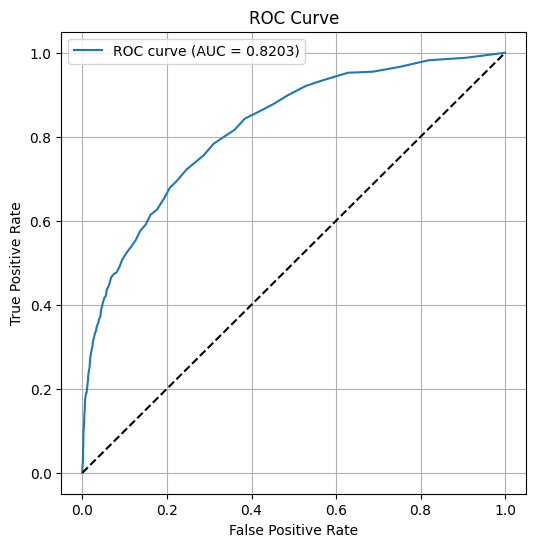

In [125]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (assuming binary classification)
y_prob = rf.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

# Optional: plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


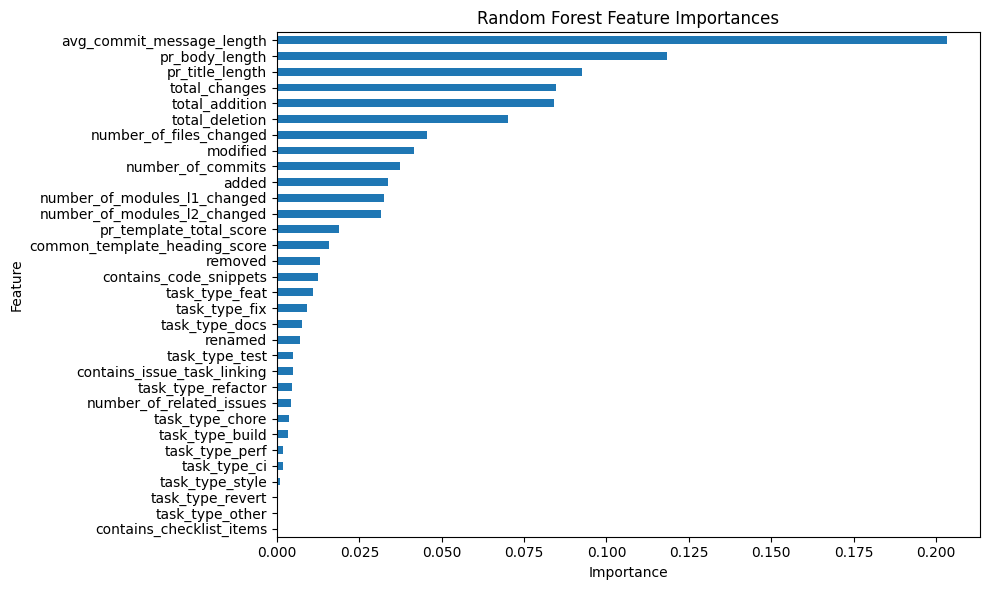

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf is your trained RandomForestClassifier and X_train exists
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=True)  # ascending for horizontal bar

# Plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind="barh")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
